# Exploratory Data Analysis (EDA) on Zomato dataset

Let us learn about univariate analysis and bivariate analysis using the dataset of Zomato, the online food delivery platform.

Before we go ahead with the analysis, let us have a quick understanding of all the columns in the data.

Here’s a brief column-wise description of the zomato.csv dataset for your reference.

1. **Restaurant ID**: A unique identifier for each restaurant in the dataset.
2. **Restaurant Name**: The name of the restaurant.
3. **Country Code**: A numeric code representing the country where the restaurant is located.
4. **City**: The city where the restaurant is located.
5. **Address**: The physical address of the restaurant.
6. **Locality**: A more specific location or area within the city.
7. **Locality Verbose**: A detailed description of the restaurant's location.
8. **Longitude**: The geographic longitude of the restaurant's location.
9. **Latitude**: The geographic latitude of the restaurant's location.
10. **Cuisines**: A list of cuisines offered by the restaurant, such as Indian, Chinese, Italian, etc.
11. **Average Cost for Two**: The average cost for a meal for two people at the restaurant.
12. **Currency**: The currency used in the restaurant's pricing.
13. **Has Table booking**: A boolean column indicating whether the restaurant accepts table bookings.
14. **Has Online delivery**: A boolean column indicating whether the restaurant offers online delivery.
15. **Is delivering now**: A boolean column indicating whether the restaurant is currently delivering food.
16. **Switch to order menu**: A boolean column indicating if the restaurant has a menu for ordering food online.
17. **Price range**: A numerical value indicating the price range at the restaurant (1 to 4 scale).
18. **Aggregate rating**: The overall rating of the restaurant based on user reviews.
19. **Rating color**: The rating category (e.g., Dark Green, Green, Orange, etc.), indicating the quality of the restaurant based on the rating.
20. **Rating text**: Descriptive text based on the restaurant's rating (e.g., Excellent, Very Good, Good, etc.).
21. **Votes**: The number of user votes or reviews received for the restaurant.

In the 'Country-Code.xlsx' file, we have 
1. **Country**: The name of the country where the restaurant is located.
2. **Country Code**: The code number for every country in the dataset

### Loading the necessary libraries

In [2]:
# Import necessary libraries required for the data exploration
# Loading "numpy" and "pandas" for manipulating numbers, vectors and data frames
# Loading "matplotlib.pyplot" and "seaborn" for data visualisation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading in the 'zomato.csv' & 'Country-Code.xlsx' file as a Pandas Data Frame

Here we have used a CSV file which is on our local system drive. You can also use the URL (https://www.kaggle.com/datasets/swatikhedekar/eda-on-zomato-dataset) of the dataset from Kaggle or Github or use the relevant function based on the file format of the input data.

In [10]:
# Load the zomato.csv file
#UTF-8 is the most common "alphabet" for modern text—covers almost every language.
#ISO-8859-1 (Latin-1) is an older "alphabet" that covers Western European letters (é, ñ, ü, etc.).
zomato_df = pd.read_csv('C:\\Users\\NehaRamchandani\\Downloads\\W2 - Data Preprocessing Demo\\zomato.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataframe
print(zomato_df.head())

# Load the Country-Code.xlsx file
country_code_df = pd.read_excel('C:\\Users\\NehaRamchandani\\Downloads\\W2 - Data Preprocessing Demo\\Country-Code.xlsx')

# Display the first few rows of the dataframe
print(country_code_df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

Now that we have loaded both the datasets, one is the zomato_df (from zomato.csv) file, the other a country_code_df (from Country_Code.xlsx) file, let us merge the both in a single file to get the country names.

In [13]:
# Merge the datasets on the 'Country Code' column
# Consider zomato_df as left data
# Consider country_code_df as right data
zomato_df = zomato_df.merge(country_code_df[['Country Code', 'Country']], on = 'Country Code' , how = 'left')

# Print the column names to check the correct column names
zomato_df.columns

# After the merge, ensure the correct column name for 'Country'
# Check if there's a column like 'Country_x' or 'Country_y' and select it
zomato_df['Country'] = zomato_df['Country_y'] if 'Country_y' in zomato_df.columns else zomato_df['Country']

# Drop unnecessary columns (if any)
# Since we already have the country names in the column 'Country', we would not need the columns 'Country Code' and 'Country_y'. 
# So we are dropping the same.
zomato_df = zomato_df.drop(['Country_y', 'Country Code'], errors = 'ignore')

# Display the updated dataframe


# Now drop 'Country_x' as we have country names in 'Country' column
# Similarly, since we already have the country names in the column 'Country', we would not need the columns 'Country_x'
zomato_df = zomato_df.drop(['Country_x'], errors = 'ignore')

In [14]:
zomato_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country_x,Country_y,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Phillipines,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,Phillipines,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,4,4.4,Green,Very Good,270,Phillipines,Phillipines,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,Phillipines,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,Phillipines,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,3,4.1,Green,Very Good,788,Turkey,Turkey,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,3,4.2,Green,Very Good,1034,Turkey,Turkey,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,4,3.7,Yellow,Good,661,Turkey,Turkey,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,4,4.0,Green,Very Good,901,Turkey,Turkey,Turkey


In [12]:
# We are checking if we have all the relevant columns, and have dropped unnecessary columns.
# Getting the column names of the data frame using ".columns"


Index(['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

Let's get started with our exploration. We shall do this by finding the answers to a few critical questions, that may be of interest to the company.

# Questions for Practice

1. What is the distribution of restaurant ratings across all restaurants? What inferences can you draw from the same?

   (Note that each row represents a restaurant)
   

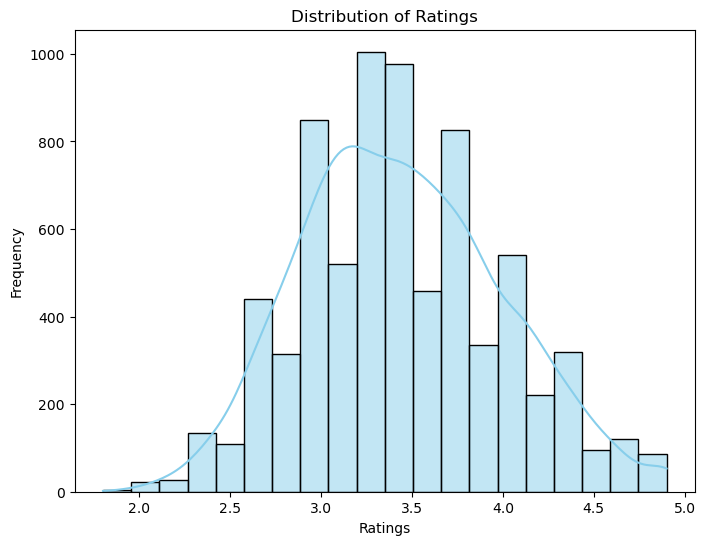

In [17]:
# Filter out the restaurants with a rating of 0 since no rating was given to those restaurants
filtered_ratings = zomato_df[zomato_df['Aggregate rating'] > 0]

# Plotting the distribution of restaurant ratings
plt.figure(figsize = (8,6))
sns.histplot(filtered_ratings['Aggregate rating'], bins = 20, kde = True, color = 'skyblue')

# Adding title and labels
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

# Display the plot
plt.show()

### Inferences drawn from the solution

2. What is the average price range of restaurants across different cities? List the cities with highest range and the ones with lowest range. Draw conclusions from the output.

(Note that here price range values are integer values from 1 to 4, 1 representing an affordable range of restaurants, and 4 would indicate expensive restaurants).  

To answer this question, you can calculate the mean price range for each city.

In [21]:
# Group by 'City' and calculate the mean 'Price range' and sort them in descending order
city_price_range_mean = zomato_df.groupby('City')['Price range'].mean().sort_values(ascending = False)
city_price_range_mean
# Get the highest price range and lowest price range
highest_price_range = city_price_range_mean.max()
lowest_price_range = city_price_range_mean.min()

# List all cities with the highest price range
cities_highest = city_price_range_mean[city_price_range_mean == highest_price_range]

# List all cities with the lowest price range
cities_lowest = city_price_range_mean[city_price_range_mean == lowest_price_range] 

# Print the results
print(cities_highest)
print(cities_lowest)

City
Princeton           4.0
Inner City          4.0
Vineland Station    4.0
Johannesburg        4.0
Panchkula           4.0
Pasay City          4.0
Paynesville         4.0
Name: Price range, dtype: float64
City
Miller            1.0
Mc Millan         1.0
Vernonia          1.0
Dicky Beach       1.0
Lakeview          1.0
Lakes Entrance    1.0
Inverloch         1.0
Fernley           1.0
Clatskanie        1.0
Name: Price range, dtype: float64


### Inferences drawn from the solution

3. What is the distribution of restaurants that are offering online delivery across countries? What inferences can you draw from the same?

 To answer this question, we need the count of how many restaurants offer online delivery and how many do not. Also, we need to find this across the countries, and compare.
  

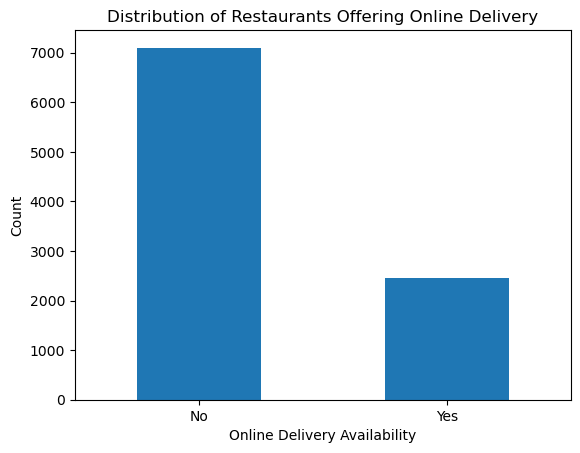

Has Online delivery,No,Yes
Country,,
Australia,24.0,NaN
Brazil,60.0,NaN
Canada,4.0,NaN
India,6229.0,2423.0
Indonesia,21.0,NaN
New Zealand,40.0,NaN
Phillipines,22.0,NaN
Qatar,20.0,NaN
Singapore,20.0,NaN


In [24]:
# Frequency of restaurants offering online delivery
online_delivery_count = zomato_df['Has Online delivery'].value_counts()
online_delivery_count

# Plotting the frequency of online delivery
online_delivery_count.plot(kind='bar')

# Adding title and labels
plt.title('Distribution of Restaurants Offering Online Delivery')
plt.xlabel('Online Delivery Availability')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Now, to check if it varies significantly across different countries
# Group by 'Country Code' and get the count of restaurants offering online delivery
online_delivery_by_country = zomato_df.groupby('Country')['Has Online delivery'].value_counts().unstack()

# Display the result to understand the variation across countries
online_delivery_by_country

### Inferences drawn from the solution

4. What is the distribution of the 'Average Cost for two' in India? Draw inferences from the output.

count    8652.000000
mean      623.370319
std       595.676124
min         0.000000
25%       300.000000
50%       450.000000
75%       700.000000
max      8000.000000
Name: Average Cost for two, dtype: float64

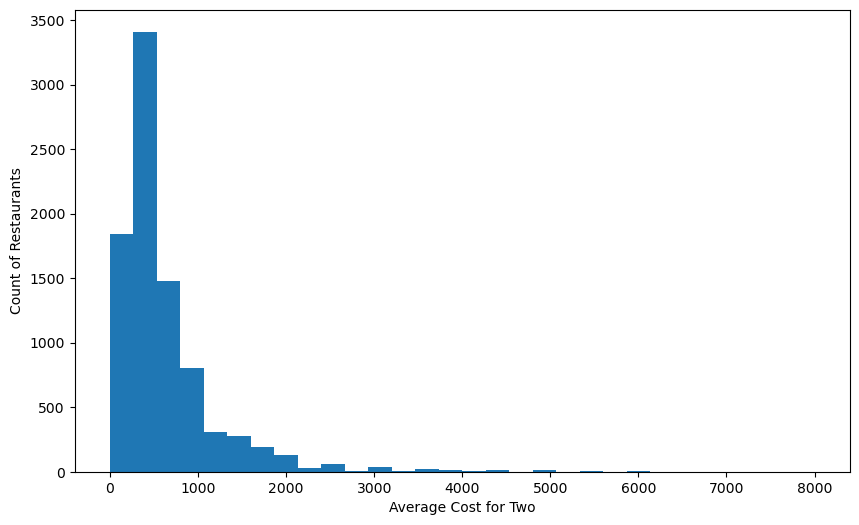

In [28]:
# Filter for Indian restaurants
india_df = zomato_df[zomato_df['Country'] == 'India']

# Plot the distribution
plt.figure(figsize = (10, 6))
plt.hist(india_df['Average Cost for two'], bins = 30)
plt.xlabel('Average Cost for Two')
plt.ylabel('Count of Restaurants')

# Display summary statistics
india_df['Average Cost for two'].describe()

### Inferences drawn from the solution

### Inferences drawn from the solution
So we can see that 'North Indian' cuisine is most popular, and forms 9.8% of the share of all cuisines.

5. Does the availability of the feature 'Has Table booking' impact the aggregate rating? Draw inferences from the output.

To create the boxplot excluding the 0 ratings, we'll first filter the dataset to remove restaurants with a rating of 0. Then, we will generate the boxplot to compare the aggregate ratings between restaurants with and without table booking.

<Axes: xlabel='Has Table booking', ylabel='Aggregate rating'>

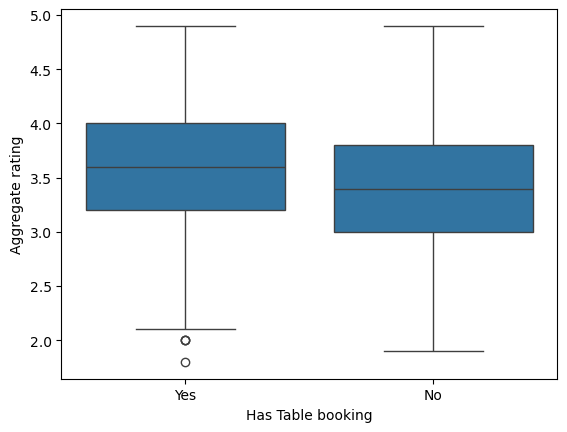

In [29]:
# Filter out the restaurants with 0 ratings
filtered_data = zomato_df[zomato_df['Aggregate rating'] > 0]

# Boxplot for 'Has Table booking' vs 'Aggregate rating' (excluding 0 ratings)
sns.boxplot(x = 'Has Table booking' , y = 'Aggregate rating', data = filtered_data)

# Adding title and labels


# Display the plot


# Calculate the average ratings for restaurants with and without table booking (excluding 0 ratings)


# Display the average ratings


In [30]:
#To calculate the correlation between Table Booking (where Yes is coded as 1 and No as 0) and Aggregate Rating

# Convert 'Has Table booking' column to numeric (Yes = 1, No = 0)
zomato_df['Table booking numeric'] = zomato_df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the Pearson correlation coefficient between 'Table booking' and 'Aggregate rating'
correlation = zomato_df['Table booking numeric'].corr(zomato_df['Aggregate rating'])

# Display the correlation result
print(f"Pearson correlation coefficient between Table Booking (Yes=1, No=0) and Aggregate Rating: {correlation:.2f}")




Pearson correlation coefficient between Table Booking (Yes=1, No=0) and Aggregate Rating: 0.19


### Inferences drawn from the solution

6. Does having an online delivery option influence the restaurant's rating? Which country's restaurant has the best and which one has the worst rating out of those who do not offer online delivery? Draw inferences from the output.

To investigate whether having an online delivery option influences restaurant ratings, we can compare the ratings of restaurants that offer online delivery and those that do not. We will use a box plot to visually compare the distributions of ratings for both groups (We are not including restaurants that have a 0 rating).

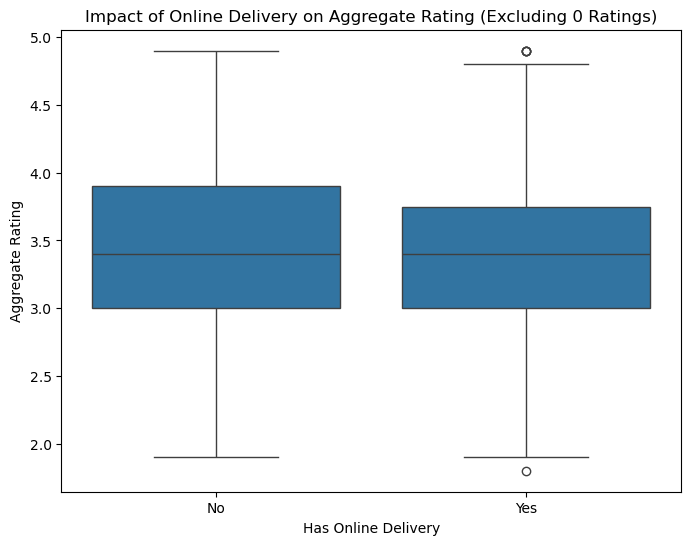

Country's restaurant with the best rating (no online delivery): Phillipines with rating 4.47
Country's restaurant with the worst rating (no online delivery): India with rating 3.34


In [31]:
# Filter out the restaurants with a 0 rating
filtered_data = zomato_df[zomato_df['Aggregate rating'] > 0]

# Boxplot for 'Has Online delivery' vs 'Aggregate rating' (excluding 0 ratings)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=filtered_data)

# Adding title and labels
plt.title('Impact of Online Delivery on Aggregate Rating (Excluding 0 Ratings)')
plt.xlabel('Has Online Delivery')
plt.ylabel('Aggregate Rating')

# Display the plot
plt.show()

# Calculate the best and worst countries for restaurants without online delivery
no_online_delivery = filtered_data[filtered_data['Has Online delivery'] == 'No']

# Group by 'Country Code' and calculate the mean rating for restaurants without online delivery
country_rating_no_delivery = no_online_delivery.groupby('Country')['Aggregate rating'].mean()

# Find the country with the highest and lowest ratings
best_country = country_rating_no_delivery.idxmax()
worst_country = country_rating_no_delivery.idxmin()

# Get the average ratings for the best and worst countries
best_country_rating = country_rating_no_delivery.max()
worst_country_rating = country_rating_no_delivery.min()

# Display the results
print(f"Country's restaurant with the best rating (no online delivery): {best_country} with rating {best_country_rating:.2f}")
print(f"Country's restaurant with the worst rating (no online delivery): {worst_country} with rating {worst_country_rating:.2f}")

### Inferences drawn from the solution

7. Do restaurants in different countries have significantly different ratings?

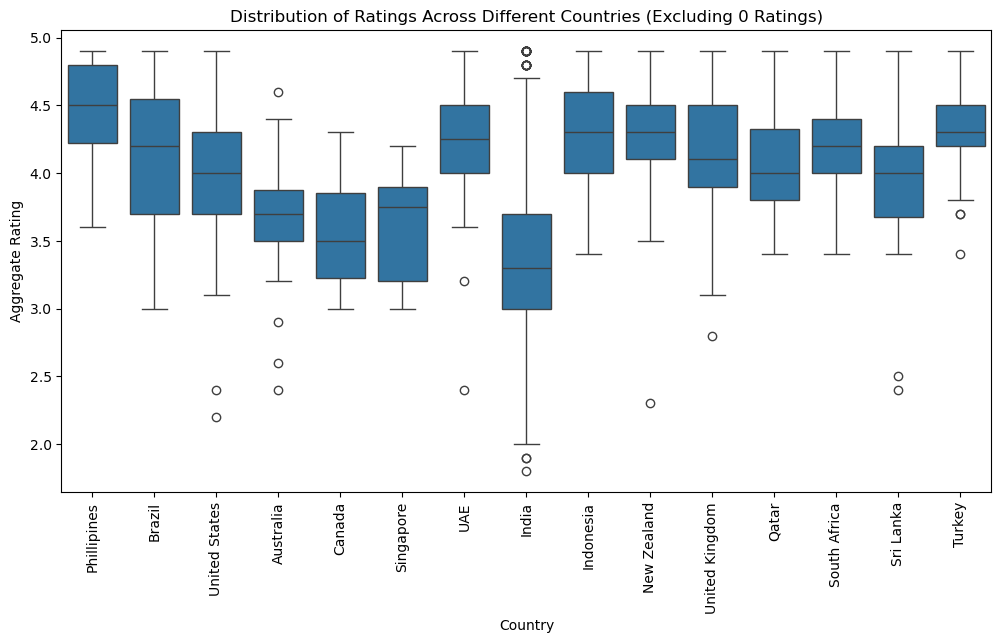

In [32]:
# Filter out the restaurants with a 0 rating
filtered_data = zomato_df[zomato_df['Aggregate rating'] > 0]

# Boxplot to visualize the distribution of ratings across countries
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Aggregate rating', data=filtered_data)
plt.title('Distribution of Ratings Across Different Countries (Excluding 0 Ratings)')
plt.xlabel('Country')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Inferences drawn from the solution

8. What is the distribution of restaurants with and without table booking option, that serve only 'Italian', only 'Chinese' and only 'American' cuisines? Draw inferences from the output.

To analyze the distribution of restaurants that serve only 'Italian', 'Chinese', and 'American' cuisines, and whether they offer table booking, we can follow these steps:

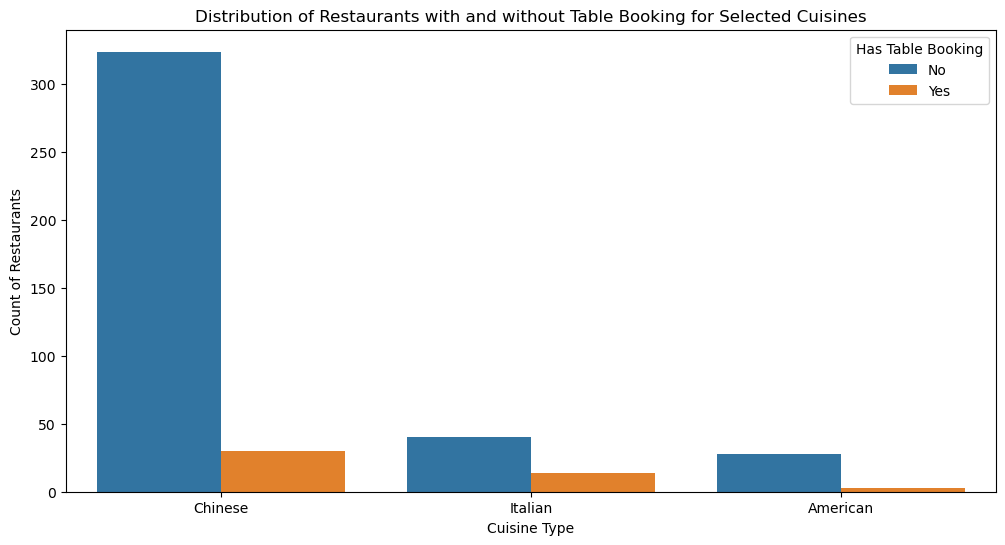

In [33]:
# Filter the dataset for restaurants that serve only 'Italian', 'Chinese', or 'American' cuisines
cuisines_of_interest = ['Italian', 'Chinese', 'American']
filtered_data = zomato_df[zomato_df['Cuisines'].isin(cuisines_of_interest)]

# Countplot for 'Cuisines' vs 'Has Table booking'
plt.figure(figsize=(12, 6))
sns.countplot(x='Cuisines', hue='Has Table booking', data=filtered_data)

# Adding title and labels
plt.title('Distribution of Restaurants with and without Table Booking for Selected Cuisines')
plt.xlabel('Cuisine Type')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Has Table Booking', labels=['No', 'Yes'])
plt.show()

### Inferences drawn from the solution

9. Since 90% of the restaurants listed on Zomato in this data are from India, find out if the average cost for two has an influence on ratings in India. Draw inferences from the output.

To explore whether there is a relationship between the average cost for two and the restaurant ratings (Aggregate rating), we can calculate the correlation coefficient between the two variables and visualize their relationship using a scatter plot.

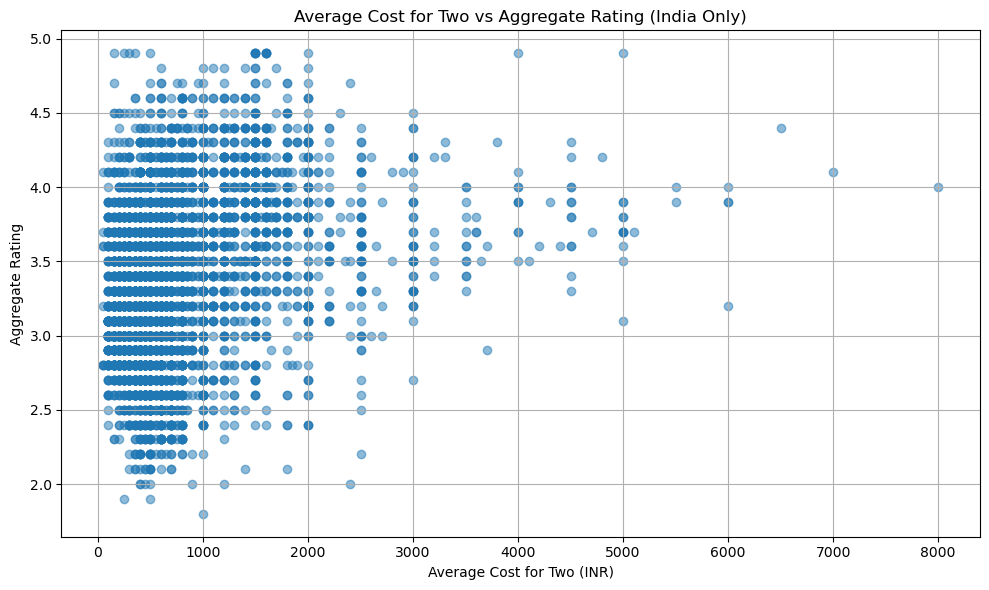

Correlation: 0.31252966072156524


In [34]:
# Filter data for India only
india_df = zomato_df[zomato_df['Country'] == 'India']

# Remove rows with 0 rating or 0 average cost for two
india_df = india_df[(india_df['Aggregate rating'] > 0) & 
                    (india_df['Average Cost for two'] > 0)]

# Create a new DataFrame with only 'Average Cost for two' and 'Aggregate rating'
cost_rating_df = india_df[['Average Cost for two', 'Aggregate rating']]

# Select relevant columns
cost_rating_df = india_df[['Average Cost for two', 'Aggregate rating']]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cost_rating_df['Average Cost for two'], cost_rating_df['Aggregate rating'], alpha=0.5)
plt.title('Average Cost for Two vs Aggregate Rating (India Only)')
plt.xlabel('Average Cost for Two (INR)')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient between cost and rating
correlation_value = cost_rating_df['Average Cost for two'].corr(cost_rating_df['Aggregate rating'])

# Print the result
print("Correlation:", correlation_value)

### Inferences drawn from the solution

10. How does the price range affect the average ratings of restaurants, and how is this influenced by the presence of online delivery? Draw inferences from the output.

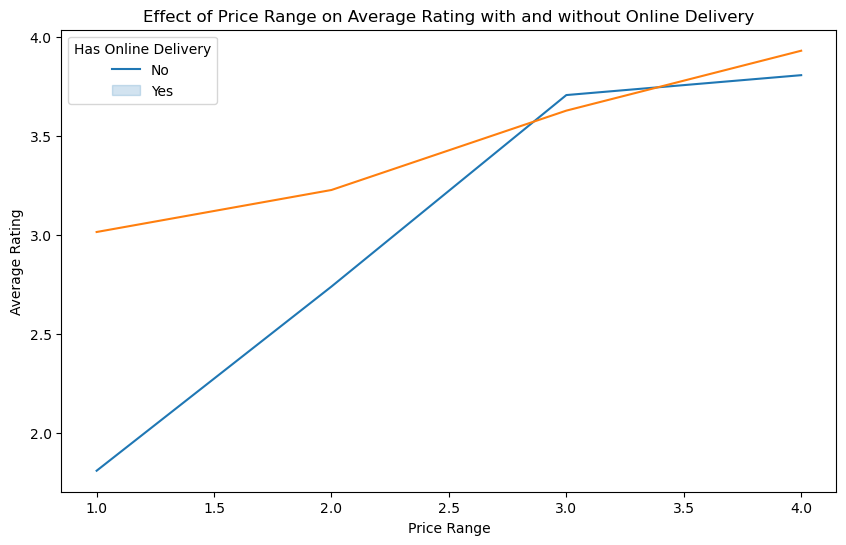

In [35]:
# Group by 'Price range' and 'Has Online delivery' to calculate the mean 'Aggregate rating'
average_ratings = zomato_df.groupby(['Price range', 'Has Online delivery'])['Aggregate rating'].mean().reset_index()

# Plotting the results as a line plot to show how the average rating changes by price range and online delivery
plt.figure(figsize=(10, 6))
sns.lineplot(x='Price range', y='Aggregate rating', hue='Has Online delivery', data=average_ratings, markers=True)

# Adding title and labels
plt.title('Effect of Price Range on Average Rating with and without Online Delivery')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.legend(title='Has Online Delivery', labels=['No', 'Yes'])
plt.show()

### Inferences drawn from the solution